In [1]:
## Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_excel
from pandas import read_csv
from numpy import percentile
import itertools
from matplotlib.backends.backend_pdf import PdfPages
from mlxtend.plotting import plot_linear_regression
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 12)})
from scipy.stats import norm
import statistics
#sns.set(rc={'figure.figsize':(20, 10)})
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib as mpl

In [2]:
## Function for changing data type to numric

def NumericDtype(dataframe):
    columns1=list(dataframe)
    for i in columns1:
        dataframe[i]=pd.to_numeric(dataframe[i], errors='coerce')
        dataframe[i] = dataframe[i].dropna()
    return;

In [3]:
## calculating summary ##
def summary5point(dataframe):
    perc=[0.25,0.50,0.75]
    include=['object', 'float', 'int']
    desc = dataframe.describe(percentiles = perc, include = include)
    #dataframe=str(dataframe)
    desc.to_csv('dataframe'+'.csv')
    return;

In [4]:
data1= pd.read_csv('Combined_data_Tank_variable_Hourly_Track_rem_Auto_clean.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
df_Hour=data1.copy()

In [5]:
NumericDtype(df_Hour)

In [6]:
# Calculating correlation among the variables and save it to csv
corr = df_Hour.corr() # you can change df_hour to df_daily for daily basis correlation
corr.to_csv('FGO_correlation_all_varirable_ Auto_mode_updated.csv')

In [7]:
df_Hour['Average Tanks Froth Velocities SP']=df_Hour[['TK1551 VELOCITY TO AIR CTRL SP - mm/s', 'TK1552 VELOCITY TO AIR CTRL SP - mm/s',
                                                     'TK1553 VELOCITY TO AIR CTRL SP - mm','TK1554 VELOCITY TO AIR CTRL SP - mm',
                                                     'TK1555 VELOCITY TO AIR CTRL SP - mm']].mean(axis=1)
df_Hour['Average Tanks Froth Velocities PV']=df_Hour[['TK1551 VELOCITY TO AIR CTRL PV - mm/s','TK1552 VELOCITY TO AIR CTRL PV - mm/s',
                                                     'TK1553 VELOCITY TO AIR CTRL PV - mm/s','TK1554 VELOCITY TO AIR CTRL PV - mm/s',
                                                     'TK1555 VELOCITY TO AIR CTRL PV - mm/s']].mean(axis=1)

In [8]:
df_Hour['Average Tank Levels SP']=df_Hour[['FGO TK1551 Level Ctr SP - mm','FGO TK1552 Level Ctr SP - mm',
                                           'FGO TK1553 Level Ctr SP - mm','FGO TK1554 Level Ctr SP - mm',
                                            'FGO TK1555 Level Ctr SP - mm']].mean(axis=1)
df_Hour['Average Tank Levels PV']=df_Hour[['FGO TK1551 Level Ctr PV - mm','FGO TK1552 Level Ctr PV - mm',
                                           'FGO TK1553 Level Ctr PV - mm','FGO TK1554 Level Ctr PV - mm',
                                           'FGO TK1555 Level Ctr PV - mm']].mean(axis=1)

In [9]:
df_Hour['Average Tank Airflows SP']=df_Hour[['TK1551 Air Blower Flow loop SP - m3/h','TK1552 Air Blower Flow loop SP - m3/h',
                                           'TK1553 Air Blower Flow loop SP - m3/h','TK1554 Air Blower Flow loop SP - m3/h',
                                            'TK1555 Air Blower Flow loop SP - m3/h']].mean(axis=1)
df_Hour['Average Tank Airflows PV']=df_Hour[['TK1551 Air Blower Flow Loop PV - m3/h', 'TK1552 Air Blower Flow Loop PV - m3/h',
                                           'TK1553 Air Blower Flow Loop PV - m3/h','TK1554 Air Blower Flow Loop PV - m3/h',
                                           'TK1555 Air Blower Flow Loop PV - m3/h']].mean(axis=1)

In [81]:
Analysis_1=['FGO Mass Pull OP - mm/s','TK1551 VELOCITY TO AIR CTRL SP - mm/s','TK1552 VELOCITY TO AIR CTRL SP - mm/s',
           'TK1553 VELOCITY TO AIR CTRL SP - mm','TK1554 VELOCITY TO AIR CTRL SP - mm','TK1555 VELOCITY TO AIR CTRL SP - mm']

Analysis_2_op = ['TK1551 VELOCITY TO AIR CTRL OP - m3/h','TK1552 VELOCITY TO AIR CTRL OP - m3/h',
                 'TK1553 VELOCITY TO AIR CTRL OP - %','TK1554 VELOCITY TO AIR CTRL OP - %',
                 'TK1555 VELOCITY TO AIR CTRL OP - %']
Analysis_2_SP = ['TK1551 Air Blower Flow loop SP - m3/h','TK1552 Air Blower Flow loop SP - m3/h',
                 'TK1553 Air Blower Flow loop SP - m3/h','TK1554 Air Blower Flow loop SP - m3/h',
                 'TK1555 Air Blower Flow loop SP - m3/h']
Analysis_3_sp = ['FGO TK1551 Level Ctr SP - mm','FGO TK1552 Level Ctr SP - mm','FGO TK1553 Level Ctr SP - mm',
                 'FGO TK1554 Level Ctr SP - mm','FGO TK1555 Level Ctr SP - mm']
Analysis_4_sp=['Collector Added To TK1553 SP -  m3/h']
Analysis_5_sp = ['FROTHER  Flow 1 to TK1551/2 Controller SP -  L/H','FROTHER  Flow 2 to TK1551/2 Controller SP -  L/H',
                 'FROTHER  Flow to TK1551 Controller SP -  L/H']

Analysis_6_PV=['FGO TK1551 Level Ctr PV - mm','TK1551 Air Blower Flow Loop PV - m3/h',
               'TK1551 VELOCITY TO AIR CTRL PV - mm/s','Collector Added To TK1550 PV -  m3/h',
               'FROTHER  Flow to TK1551 Controller PV -  L/H','FROTHER  Flow 1 to TK1551/2 Controller PV -  L/H',
              'FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H','pH Indication for FGO - PV -  pH',
               'FGO CYCLONE O/F Sizing Control PV - % -150']
Analysis_7_PV = ['FGO TK1552 Level Ctr PV - mm','TK1552 Air Blower Flow Loop PV - m3/h',
                 'TK1552 VELOCITY TO AIR CTRL PV - mm/s','PAX Flow to TK1552/3 Controller PV -  L/H',
                'FROTHER  Flow 1 to TK1551/2 Controller PV -  L/H','FROTHER  Flow 2 to TK1551/2 Controller PV -  L/H',
                 'pH Indication for FGO - PV -  pH','FGO CYCLONE O/F Sizing Control PV - % -150']
Analysis_8_PV = ['FGO TK1553 Level Ctr PV - mm','TK1553 Air Blower Flow Loop PV - m3/h',
                'TK1553 VELOCITY TO AIR CTRL PV - mm/s','PAX Flow to TK1552/3 Controller PV -  L/H',
                'pH Indication for FGO - PV -  pH','FGO CYCLONE O/F Sizing Control PV - % -150']
Analysis_9_PV = ['FGO TK1554 Level Ctr PV - mm','TK1554 Air Blower Flow Loop PV - m3/h',
                'TK1554 VELOCITY TO AIR CTRL PV - mm/s','pH Indication for FGO - PV -  pH','FGO CYCLONE O/F Sizing Control PV - % -150']
Analysis_10_PV = ['FGO TK1555 Level Ctr PV - mm','TK1555 Air Blower Flow Loop PV - m3/h',
                  'TK1555 VELOCITY TO AIR CTRL PV - mm/s','pH Indication for FGO - PV -  pH',
                 'FGO CYCLONE O/F Sizing Control PV - % -150']
Analysis_11_PV = ['TK1551 VELOCITY TO AIR CTRL PV - mm/s','TK1552 VELOCITY TO AIR CTRL PV - mm/s',
                  'TK1553 VELOCITY TO AIR CTRL PV - mm/s','TK1554 VELOCITY TO AIR CTRL PV - mm/s',
                  'TK1555 VELOCITY TO AIR CTRL PV - mm/s','FGO Mass Pull % PV - %']

Analysis_12_avg_SP=['Average Tank Levels SP','Average Tank Levels PV']
 #'Average Tank Levels SP', 'Average Tank Airflows SP']
Analysis_12_avg_PV=['Average Tanks Froth Velocities PV',
 'Average Tank Levels PV','Average Tank Airflows PV']

Analysis13=['FGO CYCLONE O/F Sizing Control PV - % -150']
#,
#             'pH Indication for FGO - PV -  pH',
#                  'FGO CYCLONE O/F Sizing Control PV - % -150']
# #,
#'pH Indication for FGO - PV -  pH','FGO CYCLONE O/F Sizing Control PV - % -150']
#,'FGO CYCLONE O/F Sizing Control PV - % -150']

In [82]:
df_analysis1=df_Hour[Analysis_1]
df_analysis2_op=df_Hour[Analysis_2_op]
df_analysis2_sp=df_Hour[Analysis_2_SP]
df_analysis3_sp=df_Hour[Analysis_3_sp]
df_analysis4_sp = df_Hour[Analysis_4_sp]
df_analysis5_sp = df_Hour[Analysis_5_sp]
df_analysis6_PV = df_Hour[Analysis_6_PV]
df_analysis7_PV = df_Hour[Analysis_7_PV]
df_analysis8_PV = df_Hour[Analysis_8_PV]
df_analysis9_PV = df_Hour[Analysis_9_PV]
df_analysis10_PV = df_Hour[Analysis_10_PV]
df_analysis11_PV = df_Hour[Analysis_11_PV]
df_analysis12_avg_SP = df_Hour[Analysis_12_avg_SP]
df_analysis13_avg_PV = df_Hour[Analysis_12_avg_PV]
df_ana1=df_Hour[Analysis13]

## Linear Regression fitted Line

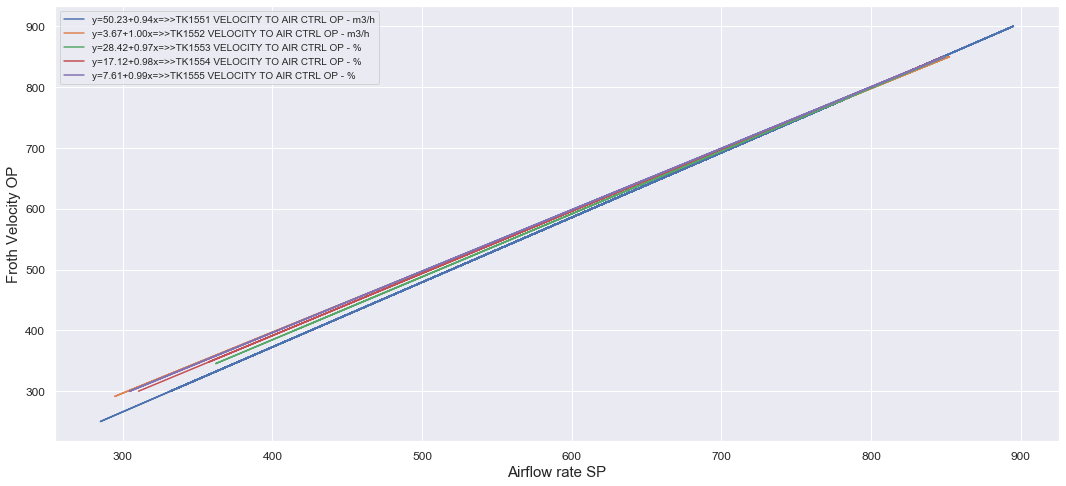

In [12]:
fig_list1=list(df_analysis2_op)
fig_list2=list(df_analysis2_sp)
#fig_list=df_Hour[list1]
pp = PdfPages('Tank_Analysis_LR6_10.pdf')
sns.set(rc={'figure.figsize':(18, 8)})
fig=plt.figure()
for i,j in zip(fig_list1,fig_list2):
#for i in fig_list1:
   # for j in fig_list2:
        x=df_Hour[i].values#.reshape((-1, 1))
        y=df_Hour[j].values#.reshape((-1, 1))
        value=df_Hour['FGO Mass Pull OP - mm/s'].corr(df_Hour[i])
       # model = LinearRegression().fit(x, y)  
    
        model = sm.OLS(y, sm.tools.add_constant(x),missing='drop')
        results = model.fit()
        coeff= results.params[1]
        intercept= results.params[0]
        y_pred = results.params[0] + results.params[1] * df_Hour[i]
        ax=plt.plot(y_pred,x,label='y={:.2f}+{:.2f}x=>>{}'.format(intercept,coeff,i))
        ax=plt.axis('auto')
        plt.xlabel('Airflow rate SP',fontsize=15)
        plt.ylabel('Froth Velocity OP',fontsize=15)
        plt.legend(fontsize=10)
        plt.xticks(fontsize=12),plt.yticks(fontsize=12)
        plt.tick_params(axis='both', which='minor', labelsize=10)
    
        #fig.suptitle(i,fontsize=25)
        #plt.show()
pp.savefig(fig)        
pp.close()

## Trend line with Equation

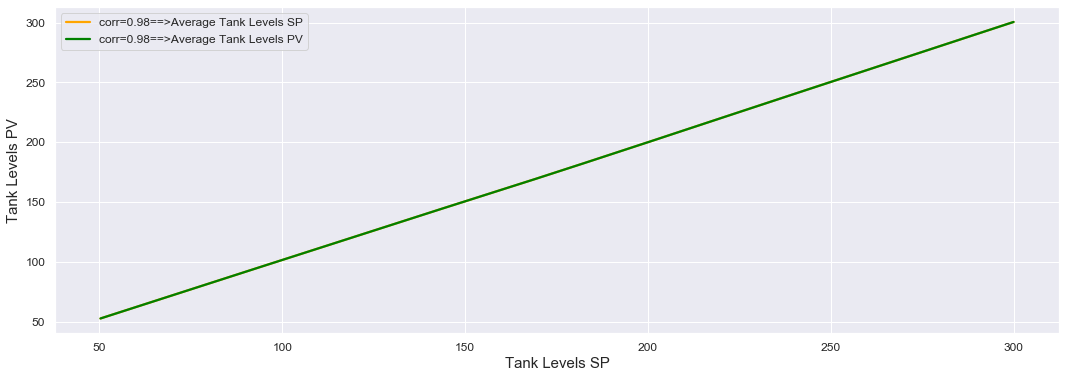

In [87]:
fig_list1=list(df_analysis12_avg_SP)
#fig_list2=list(df_analysis2_sp)
#fig_list=df_Hour[list1]
df_pl=df_Hour.copy()
#df_pl = df_pl.ewm(alpha = 0.5, ignore_na=False, axis=1).mean()
df_pl.fillna(method='ffill', axis=1, inplace=True)
#df_pl.fillna(0)
#df_pl.apply(lambda x: x.fillna(x.mean())) 
df_pl.dropna(how='any', inplace=True)

pp = PdfPages('Graph3.1.pdf')
sns.set(rc={'figure.figsize':(18, 6)})
fig=plt.figure()
count=0
#for i,j in zip(fig_list1,fig_list2):
for i in fig_list1:
   # for j in fig_list2:
        
        x1=df_pl[i].values#.reshape((-1, 1))
        y1=df_pl[j].values#.reshape((-1, 1))
        #value=df_Hour[j].corr(df_Hour[i])
       # value=df_Hour[j].corr(df_Hour[i])
       # model = LinearRegression().fit(x, y)  
        trend = np.polyfit(x1,y1,2)
        #plt.plot(x,y,'o')
        trendpoly = np.poly1d(trend) 
        #ax= plt.plot(trendpoly(x),x,label='y={:.2f}x + {:.2f}=>>{}'.format(*trend,i))
        x2=df_Hour['Average Tank Levels SP'].values#.reshape((-1, 1))
        y2=df_Hour['Average Tank Levels PV'].values
        value=df_Hour['Average Tank Levels SP'].corr(df_Hour['Average Tank Levels PV'])
        color=['orange', 'green']
        ax = sns.regplot(x2,y2 ,data=df_Hour,lowess=True,line_kws={"color":color[count]}, scatter=False,label='corr={:.2f}==>{}'.format(value,i))#'y={:.2f}x^2 + {:.2f}x+{:.2f}=>>{}'.format(*trend,i))
        ax=plt.axis('auto')
        #plt.ylim(20,300)
       # plt.xlim(20,300)
        plt.xlabel('Tank Levels SP',fontsize=15)
        plt.ylabel('Tank Levels PV',fontsize=15)
        plt.legend(fontsize=12)
        plt.xticks(fontsize=12),plt.yticks(fontsize=12)
        plt.tick_params(axis='both', which='minor', labelsize=10)
        count=count+1
        #fig.suptitle(i,fontsize=25)
        #plt.show()
        #'orange', 'green', 'aqua','red','Blue', 'yellow', 
pp.savefig(fig)        
pp.close()

In [14]:
x2=df_Hour['Average Tanks Froth Velocities SP'].values#.reshape((-1, 1))
y2=df_Hour['Average Tanks Froth Velocities PV'].values
color=['red']#,'Blue', 'yellow', 'orange', 'green', 'aqua','black','maroon','purple']
ax = sns.regplot(x2,y2 ,data=df_Hour,lowess=True,line_kws={"color":color[count]}, scatter=False,label=i)#'y={:.2f}x^2 + {:.2f}x+{:.2f}=>>{}'.format(*trend,i))
ax=plt.axis('auto')
#plt.ylim(20,300)
# plt.xlim(20,300)
plt.xlabel('Average Tanks Froth Velocities SP',fontsize=15)
plt.ylabel('Average Tanks Froth Velocities PV',fontsize=15)
plt.legend(fontsize=12)
plt.xticks(fontsize=12),plt.yticks(fontsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

IndexError: list index out of range